In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# code adapted from ChatGPT

# Define your neural network model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()

        self.step1 = nn.Linear(2, 128, bias=True)
        self.step2 = nn.ReLU()
        self.step3 = nn.Linear(128, 64, bias=True)
        self.step4 = nn.ReLU()
        self.step5 = nn.Linear(64, 16, bias=True)
        self.step6 = nn.ReLU()
        self.step7 = nn.Linear(16, 4, bias=True)

        # multi-class classification adapted from ChatGPT
        self.step8 = nn.Softmax(dim=1)

    def forward(self, x):

        # RUN IT ON A GPU if it exists
        if torch.cuda.is_available():
            x = x.to("cuda")

        x = self.step1(x)
        x = self.step2(x)
        x = self.step3(x)
        x = self.step4(x)
        x = self.step5(x)
        x = self.step6(x)
        x = self.step7(x)
        x = self.step8(x)
        
        return x

def train_model(inputs, desired_outputs, num_epochs=100, learning_rate=0.01, momentum=0.9, viz_accuracy=False):
    # Convert inputs and desired_outputs to PyTorch tensors
    inputs = torch.tensor(inputs, dtype=torch.float32)
    desired_outputs = torch.tensor(desired_outputs, dtype=torch.float32)
    
    # Create a DataLoader to handle batching (if needed)
    dataset = TensorDataset(inputs, desired_outputs)
    dataloader = DataLoader(dataset, batch_size=1000, shuffle=True)  # Adjust batch_size as needed
    
    # Initialize the model
    model = SimpleModel()
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()  # Mean Squared Error loss
    # optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    # criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, momentum=momentum)

    losses = []

    inputs = inputs.float()
    desired_outputs = desired_outputs.long()
    
    # Training loop
    for epoch in range(num_epochs):
        total_loss = 0.0
        for batch_inputs, batch_desired_outputs in dataloader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(batch_inputs)  # Forward pass

            batch_desired_outputs = batch_desired_outputs.long()

            loss = criterion(outputs, batch_desired_outputs)  # Compute the loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the model's parameters
            cur_item = loss.item()
            total_loss += cur_item
        
        # Print the average loss for this epoch
        print(f"total loss: {total_loss}")
        average_loss = total_loss / len(dataloader)
        if viz_accuracy:
            losses.append(average_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')
    
    if viz_accuracy:
        plt.scatter(x=range(1, len(losses)+1), y=losses)
        plt.xlabel("Epoch")
        plt.ylabel("Average loss")
        plt.show()

    # Return the trained model
    return model

In [86]:
df = pd.read_csv("four_directions.csv")

In [87]:
just_input = df.drop('last_matrix', axis=1)

# adapted from https://stackoverflow.com/questions/43898035/pandas-combine-column-values-into-a-list-in-a-new-column
input_data = np.array(just_input.values.tolist())

df['last_matrix'] = df['last_matrix'] - 1

In [89]:
desired_output = torch.tensor(df['last_matrix'].tolist(), dtype=torch.float32).long()

C:\Users\16089\AppData\Local\Temp\ipykernel_13576\3561614504.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  desired_outputs = torch.tensor(desired_outputs, dtype=torch.float32)


total loss: 1.4623311758041382
Epoch [1/500], Loss: 1.4623
total loss: 1.490784764289856
Epoch [2/500], Loss: 1.4908
total loss: 1.4802316427230835
Epoch [3/500], Loss: 1.4802
total loss: 1.4823814630508423
Epoch [4/500], Loss: 1.4824
total loss: 1.4792265892028809
Epoch [5/500], Loss: 1.4792
total loss: 1.491331934928894
Epoch [6/500], Loss: 1.4913
total loss: 1.4777017831802368
Epoch [7/500], Loss: 1.4777
total loss: 1.4681565761566162
Epoch [8/500], Loss: 1.4682
total loss: 1.4776026010513306
Epoch [9/500], Loss: 1.4776
total loss: 1.4812586307525635
Epoch [10/500], Loss: 1.4813
total loss: 1.4823732376098633
Epoch [11/500], Loss: 1.4824
total loss: 1.4863300323486328
Epoch [12/500], Loss: 1.4863
total loss: 1.4882861375808716
Epoch [13/500], Loss: 1.4883
total loss: 1.4887763261795044
Epoch [14/500], Loss: 1.4888
total loss: 1.4879419803619385
Epoch [15/500], Loss: 1.4879
total loss: 1.4881350994110107
Epoch [16/500], Loss: 1.4881
total loss: 1.4892876148223877
Epoch [17/500], Loss

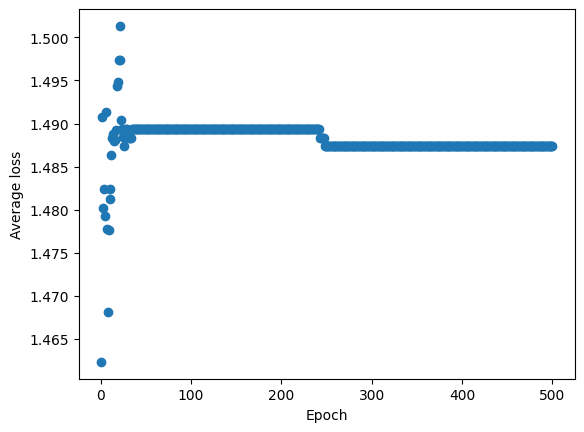

In [109]:
# Train the model
trained_model = train_model(input_data, desired_output, 500, learning_rate=0.05, viz_accuracy=True)

In [102]:
def test_model(trained_model, new_data, expected_result):
    test_input = torch.tensor(new_data, dtype=torch.float32)
    test_output = trained_model(test_input)

    predicted_classes = torch.argmax(test_output, dim=1)

    test_output_compare = torch.tensor(expected_result, dtype=torch.int)

    return float(sum(test_output_compare == predicted_classes)/len(test_input))

In [103]:
test_df = pd.read_csv("four_directions_test.csv")
just_input_test = df.drop('last_matrix', axis=1)
input_data = np.array(just_input_test.values.tolist())
test_df['last_matrix'] = test_df['last_matrix'] - 1
desired_output = torch.tensor(test_df['last_matrix'].tolist(), dtype=torch.float32).long()

In [106]:
test_model(trained_model, input_data, desired_output)

C:\Users\16089\AppData\Local\Temp\ipykernel_13576\2118059285.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_output_compare = torch.tensor(expected_result, dtype=torch.int)


0.25925925374031067

In [60]:
T = np.array([[0, 1], [1, 0]])

U = np.array([[1, 0], [-1, 1]])

inverse_U = np.array([[1, 0], [1, 1]])

start_array = np.array([0, 1])

In [36]:
test_input = np.random.randint(1, 10000, size=(500, 2))
test_output_compare = []

for i in test_input:
    test_output_compare.append([int(i[0] < i[1])])

test_model(trained_model, input_data, desired_output)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [36]:
# test the neural network with the data points from data.csv
df = pd.read_csv("data.csv")

df_input = np.random.randint(1, 100, size=(len(df), 2))

In [37]:
for i in range(0, len(df_input)):
    df_input[i][0] = df['val1'][i]
    df_input[i][1] = df['val2'][i]

In [39]:
df_classificaitons = []
for i in range(0, len(df['last_matrix_was_U'])):
    df_classificaitons.append([1-df["last_matrix_was_U"][i]])

In [40]:
test_model(trained_model, df_input, df_classificaitons)

C:\Users\16089\AppData\Local\Temp\ipykernel_26304\1059146562.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_classes = torch.tensor(test_output + 0.5, dtype=torch.int)


1.0

In [79]:
test_input = np.random.randint(1, 10000, size=(1, 2))
update_test_type = torch.tensor(test_input, dtype=torch.float32)
output = trained_model(update_test_type)
predicted_class = int(torch.tensor(output + 0.5, dtype=torch.int))
if predicted_class==1:
    next_point = np.array([test_input[0] @ T])
else: 
    next_point = np.array([test_input[0] @ U])

C:\Users\16089\AppData\Local\Temp\ipykernel_26304\2778666344.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_class = int(torch.tensor(output + 0.5, dtype=torch.int))


In [80]:
print(test_input)
print(type(test_input))
print(next_point)
print(type(next_point))
print(predicted_class)

[[5406  186]]
<class 'numpy.ndarray'>
[[5220  186]]
<class 'numpy.ndarray'>
0


In [87]:
next_point[0][0]-test_input[0][0], next_point[0][1]-test_input[0][1]
test_input[0][0]-next_point[0][0], test_input[0][1]-next_point[0][1]

(186, 0)

In [124]:
# function to plot the first 1000 steps of the Euclidean algorithm on a given point or until we reach the y-axis or x-axis
def plot_to_y_axis(cur_input): 
    for _ in range(1, 1000):
        if min(cur_input @ np.array([1, 0]), cur_input @ np.array([0, 1])) == 0:
            break
        output = trained_model(cur_input)
        predicted_class = int(torch.tensor(output + 0.5, dtype=torch.int))
        if predicted_class==1:
            next_point = np.array([np.array(cur_input)[0] @ T])
        else: 
            next_point = np.array([np.array(cur_input)[0] @ U])

        # plot the direction of steps we took to get to the x-axis
        plt.scatter(x=cur_input[0][0], y=cur_input[0][1])

        plt.scatter(x=next_point[0][0], y=cur_input[0][1])

        plt.arrow(cur_input[0][0], cur_input[0][1], next_point[0][0]-cur_input[0][0], next_point[0][1]-cur_input[0][1], width=70, 
                  length_includes_head=True)
        
        cur_input = torch.tensor(next_point, dtype=torch.float32)
    
    plt.show()

C:\Users\16089\AppData\Local\Temp\ipykernel_26304\3226270405.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_class = int(torch.tensor(output + 0.5, dtype=torch.int))


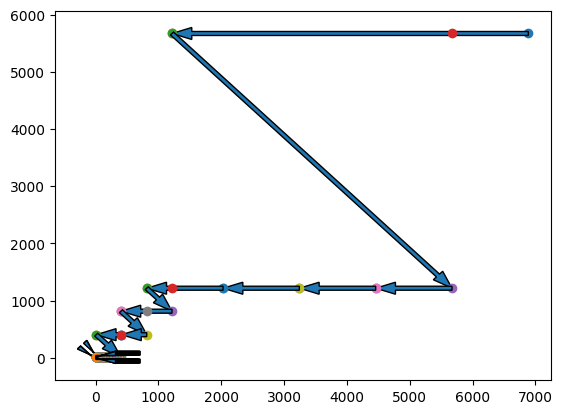

In [125]:
cur_input = np.random.randint(1, 10000, size=(1, 2))
cur_input = torch.tensor(cur_input, dtype=torch.float32)
plot_to_y_axis(cur_input)